<a href="https://colab.research.google.com/github/EZzz112/1223/blob/main/FINAL_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
import seaborn as sns
import re

In [47]:
df = pd.read_csv('/content/去掉无用.csv')
df = df.drop(columns=['1'])
df

,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,accommodates,bedrooms,price,minimum_nights,maximum_nights
0,Midtown,Manhattan,Entire apartment,2,NaN,100.0,30,1125
1,Clinton Hill,Brooklyn,Entire guest suite,3,1.0,73.0,1,730
2,Bedford-Stuyvesant,Brooklyn,Private room in apartment,2,1.0,60.0,30,730
3,Midtown,Manhattan,Private room in apartment,2,1.0,79.0,2,14
4,Upper West Side,Manhattan,Private room in apartment,1,1.0,75.0,2,14
...,...,...,...,...,...,...,...,...
37007,Woodside,Queens,Entire apartment,3,1.0,90.0,3,1125
37008,Norwood,Bronx,Private room in apartment,1,1.0,520.0,1,365
37009,Midtown,Manhattan,Private room in apartment,1,1.0,63.0,30,90
37010,Upper East Side,Manhattan,Private room in apartment,1,1.0,67.0,30,90


In [48]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37012 entries, 0 to 37011
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   neighbourhood_cleansed        37012 non-null  object 
 1   neighbourhood_group_cleansed  37012 non-null  object 
 2   property_type                 37012 non-null  object 
 3   accommodates                  37012 non-null  int64  
 4   bedrooms                      33404 non-null  float64
 5   price                         37012 non-null  float64
 6   minimum_nights                37012 non-null  int64  
 7   maximum_nights                37012 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 2.3+ MB


,accommodates,bedrooms,price,minimum_nights,maximum_nights
count,37012.000000,33404.000000,37012.000000,37012.000000,3.701200e+04
mean,2.797633,1.316399,142.842240,23.323679,5.979924e+04
std,1.845570,0.722094,275.740987,26.441255,1.116338e+07
min,0.000000,1.000000,0.000000,1.000000,1.000000e+00
25%,2.000000,1.000000,60.000000,4.000000,9.000000e+01
50%,2.000000,1.000000,99.000000,30.000000,1.125000e+03
75%,4.000000,1.000000,151.000000,30.000000,1.125000e+03
max,16.000000,21.000000,10000.000000,1250.000000,2.147484e+09


Text(0.5, 0, 'Region')

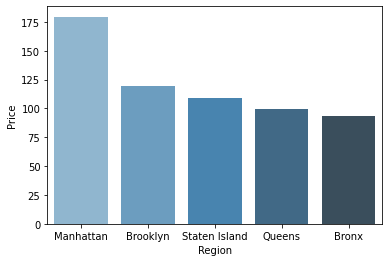

In [59]:
df_house_count = df.groupby('neighbourhood_group_cleansed')['price'].count().sort_values(ascending=False).to_frame().reset_index()
df_house_mean = df.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False).to_frame().reset_index()
sns.barplot(x='neighbourhood_group_cleansed', y='price', palette="Blues_d", data=df_house_mean)
plt.ylabel("Price")
plt.xlabel("Region")


Text(0.5, 0, 'Region')

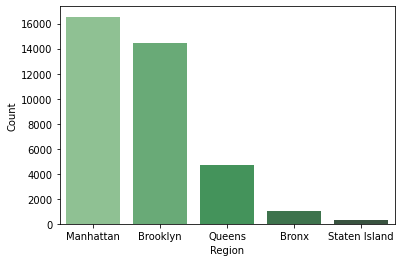

In [58]:
sns.barplot(x='neighbourhood_group_cleansed', y='price', palette="Greens_d", data=df_house_count)
plt.ylabel("Count")
plt.xlabel("Region")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


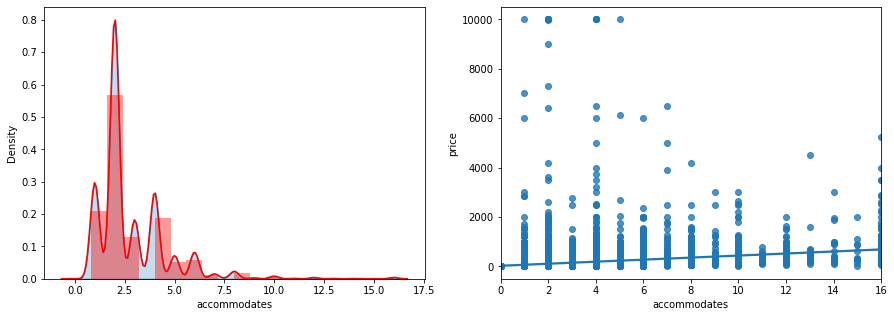

In [66]:
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(df['accommodates'], bins=20, ax=ax1, color='r')
sns.kdeplot(df['accommodates'], shade=True, ax=ax1)
sns.regplot(x='accommodates', y='price', data=df, ax=ax2)
plt.show()

In [ ]:
f, ax1= plt.subplots(figsize=(20,5))
sns.countplot(x='neighbourhood_group_cleansed	', data=df, ax=ax1)
ax1.set_title('	neighbourhood_cleansed',fontsize=15)
ax1.set_xlabel('数量')
ax1.set_ylabel('户型')
plt.show()